<a href="https://colab.research.google.com/github/mjcrgn/data_credential/blob/master/210119_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diabetes 130 US Hospitals 1999-2008**

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

Your goal is to make a classification model that can be used to predict something within the dataset.

- For example, you can choose to predict whether a patient is likely to be a readmit in the
hospital within 30days.

- You can choose which features to use in your model (race, gender, age, etc.) and train your model.

- Your project should include a description of what you’re trying to accomplish, EDA, data
wrangling, model creation, model evaluations, and model selections.

- Your analytics should include at least 2 different types of models (i.e. KNN and Random Forest).

#Project Goals

###*Group: Ariana, MJ, Tashi*

We will use various machine learning models to predict whether patients were readmitted to the hospital during 1998-2008 after their first encounter. We will NOT take into consideration whether readmission was within 30 days; we are simply predicting whether the patient was readmitted at all.

#Import data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns # Set default graph style
sns.set()
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/qc/school/CSCI/data credential/projects/data/210119 diabetes.csv'
)

#General information

In [ ]:
# Consult https://www.hindawi.com/journals/bmri/2014/781670/tab1/ for more information about columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Check % of null entries in columns
# Sum count of null values in each column, divide by length of dataframe, multiply by 100 for percentage and round to two decimal places

round(
    (df.isna().sum() / len(df) * 100), 2
)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

It seems the overwhelming majority of the weight, glucose serum results, and A1C result columns are missing data. Consequently, we will not consider these columns for our analysis, even though these would otherwise be good factors to examine.

#Preliminary Data Wrangling

The original dataset had many string entries of '?' and 'None', and some 'Unknown/Invalid' so we replaced them with NaN for Python to recognize the null values properly. 

In [ ]:
# Replace all values of ? / None with NaN
# 'None' values show in lab results when no test was administered

df = df.replace([
        '?', 
        'None'
    ], 
    np.NaN
)

Since we are only checking whether a patient was readmitted or not, we converted the answers in that column to binary values.

In [ ]:
# Convert readmitted row into binary values (readmitted within time period or not?)

df['readmitted'].replace({
        'NO':0, 
        '<30':1, 
        '>30':1
    }, 
    inplace = True
)

Check updated dataframe

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0


#Exploratory Data Analaysis

###Count of age groups by race

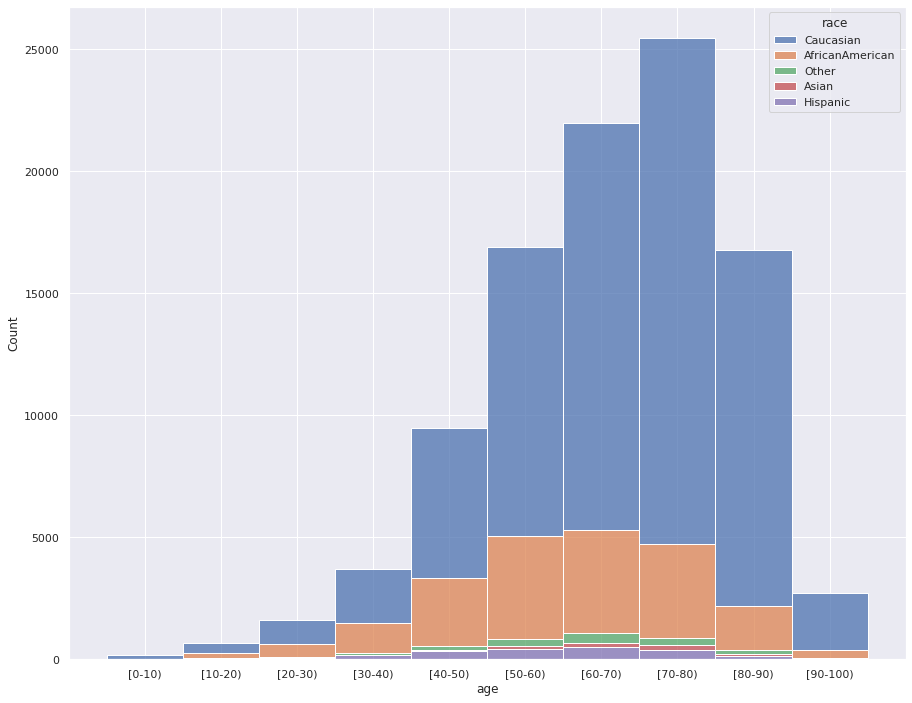

In [ ]:
sns.set(rc = {'figure.figsize': (15, 12)})
sns.histplot(
    data = df,
    x = df['age'],
    hue = df['race'],
    multiple = 'stack'
);

The overwhelming majority of patients in this dataset are Caucasian, and they are mainly concentrated between the ages of 40 and 90. This dataset does not differentiate between patients of diabates types I and II, but because type II diabetes is commonly referred to as *adult-onset diabetes* and makes up about 90% of total diabetes cases, the age demographic for this dataset makes sense.

###Distribution of number of medications by age group

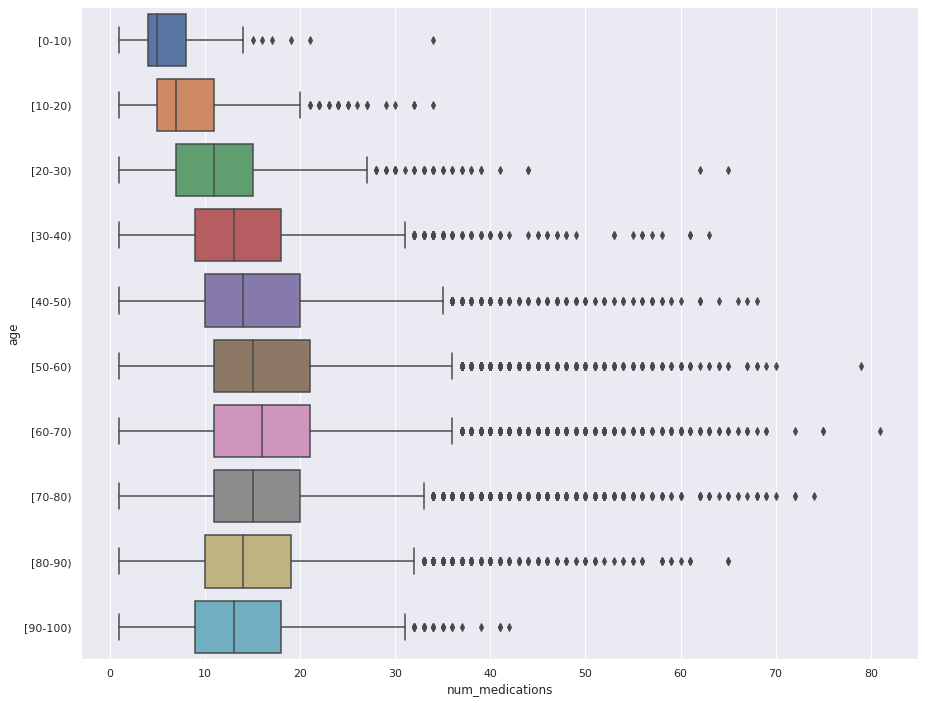

In [ ]:
sns.set(rc = {'figure.figsize': (15, 12)})
sns.boxplot(
    data = df,
    x = df['num_medications'],
    y = df['age']
);

In this dataset, the average number of medications someone takes goes up with age, but trends slightly downwards again after the age of 70. The average life expectancy in the United States was about 78 years old in 2008, so the slight drop in this dataset is not surprising.

###Days spent in hospital vs. number of procedures performed, by gender and race

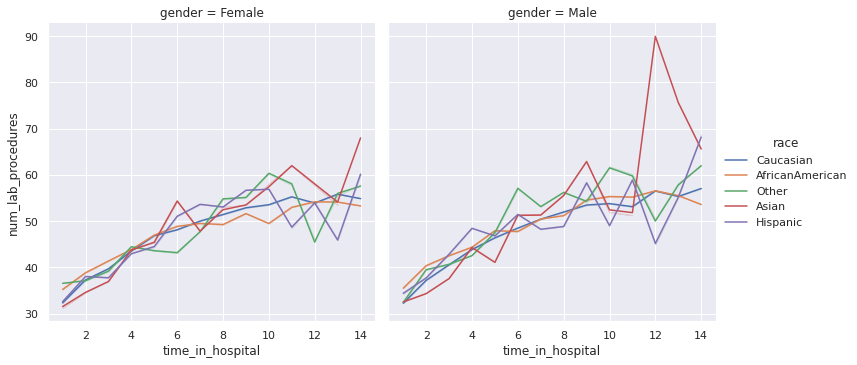

In [ ]:
sns.set(rc = {'figure.figsize': (20, 15)})
sns.relplot(
    data = df,
    x = df['time_in_hospital'],
    y = df['num_lab_procedures'],
    col = df['gender'],
    hue = df['race'],
    kind = 'line',
    ci = False
);

For both genders and all races, the number of (non-laboratory) procedures performed increased with days spent at the hospital, though there seems to be a slightly wider disparity between races for men. There is an anomaly in the dataset for Asian men who were at the hospital for exactly 12 days; the data returns to within expected boundaries at day 14, so this seems to be a single, unexpected data point. 

###Correlation heatmap for integer columns

Here, we create a heatmap for the correlation between relevant columns with integer values to readmission. This will help us see where correlations to readmission exist, if any, and help determine which features to include in our model.

In [ ]:
# Pull relevant integer columns

int_cols = df[[
    'time_in_hospital', 
    'num_lab_procedures', 
    'num_procedures', 
    'num_medications', 
    'number_outpatient', 
    'number_emergency', 
    'number_inpatient', 
    'number_diagnoses', 
    'readmitted'
]]

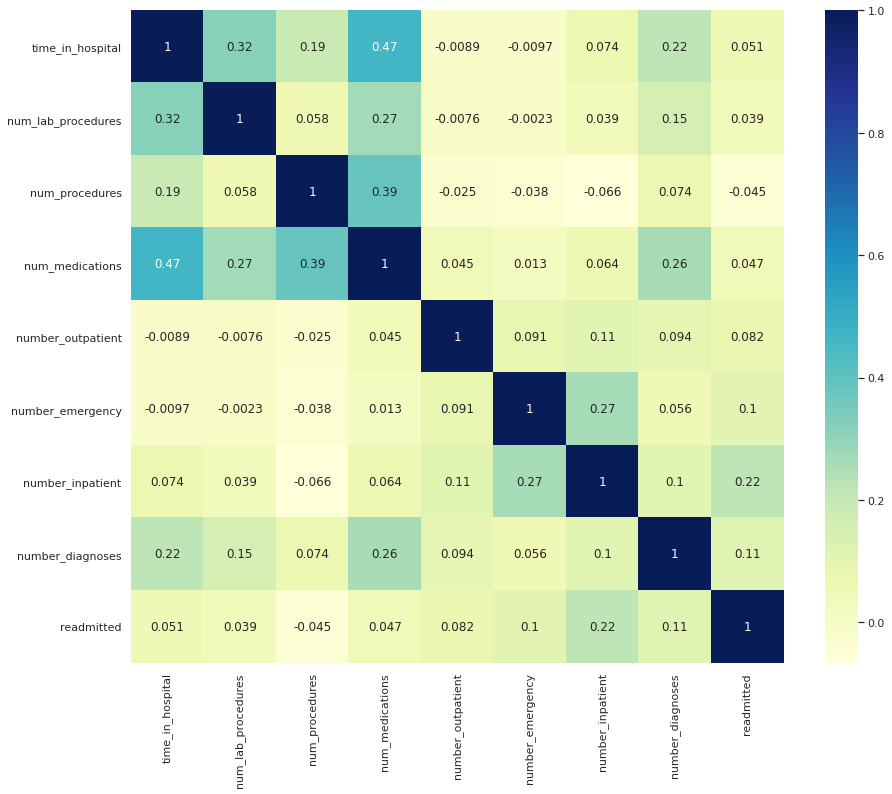

In [ ]:
corr = int_cols.corr()
sns.set(rc = {'figure.figsize': (15, 12)})
sns.heatmap(
    corr, 
    annot = True, # Adds individual correlation values to heatmap
    square = True,
    cmap = 'YlGnBu'
);

All these columns have slight positive correlations to readmission, except the number of non-laboratory procedures. We will drop that column in our analysis.

#Feature Selection

As stated above, we will drop the data for weight, glucose serum results, and A1C results because of the large amount of missing data. We will drop the number of procedures because it shows a slight *negative* correlation to readmission.

The rest of the integer columns in the previous heatmap will be included, not simply because they already show positive correlation, but all of them make sense to consider:

- If someone has already spent multiple days in the hospital, they are more likely to have future issues and be readmitted than someone who only stayed overnight.
    - This applies for the number of lab procedures performed as well, as shown in a previous graph. 
- Someone taking a high number of medications is more likely to have more health problems in general, and thus has more of a chance to be readmitted.
    - This also applies to the number of diagnoses.
- The number of previous outpatient, inpatient, and emergency room visits is especially important to our prediction. These columns check how many visits a patient has had to the hospital in the year before their first encounter.
    - Inpatient visits are particularly important and show the highest correlation to readmission out of the integer columns. While outpatient and emergency room visits both count as hospital visits, an inpatient visit means someone was *admitted at least overnight*. Given two people with otherwise similar health histories, someone who has already been to the hospital overnight at least once is much more likely to be readmitted within the next ten years.

###What other features can we consider?

- Based on current medical knowledge, race plays a factor in who is more likely to get diabetes. However, we are simply trying to determine whether someone will be readmitted to the hospital, not whether they are predisposed to a diabetes diagnosis because of their race. We will analyze this feature more with regards to readmission shortly.
- Age should be a strong factor for readmission; elderly people are more likely to go to the hospital. We will have to clean that column for use in the model, as they are decade ranges in string format.
- We are unsure whether gender plays a role, so we will look at that feature more.
- The dataset includes change in diabetes medication (including insulin), and whether someone was prescribed diabetes medication during their encounter. We will further analyze these features as well.

###Countplots for selected features

We ran countplots for the aforementioned categorical features to see if they had any correlation to readmission and could be considered for modeling.

For the previously selected integer columns, we wanted to see at which points did correlation become more pronounced, if any.

The individual countplots are below, but our visual analysis of correlation to readmission is as follows:

- **Race:** Negligible; counts seem proportionate per race
- **Gender:** More likely for females
- **Age:** More likely > 70
- **Time in hospital:** More likely >= 4 days
- **Number of lab procedures:** Slightly more likely >= 2
- **Number of medications:** More likely >= 15
- **Number of outpatient visits:** More likely >= 1
- **Number of emergency room visits:** More likely >= 1
- **Number of inpatient visits:** More likely >=1
- **Number of diagoses:**  More likely >= 6
- **Change in medication:** More likely if yes (either dosage/medication itself changed)
- **Prescribed diabetes medication:** More likely if yes

We will add gender, age, change in medication, and prescribed diabetes medication to our selected features. From its countplot, race plays a negligible role in readmission, so we will drop that.

####*Race*

Negligible; counts seem proportionate per race

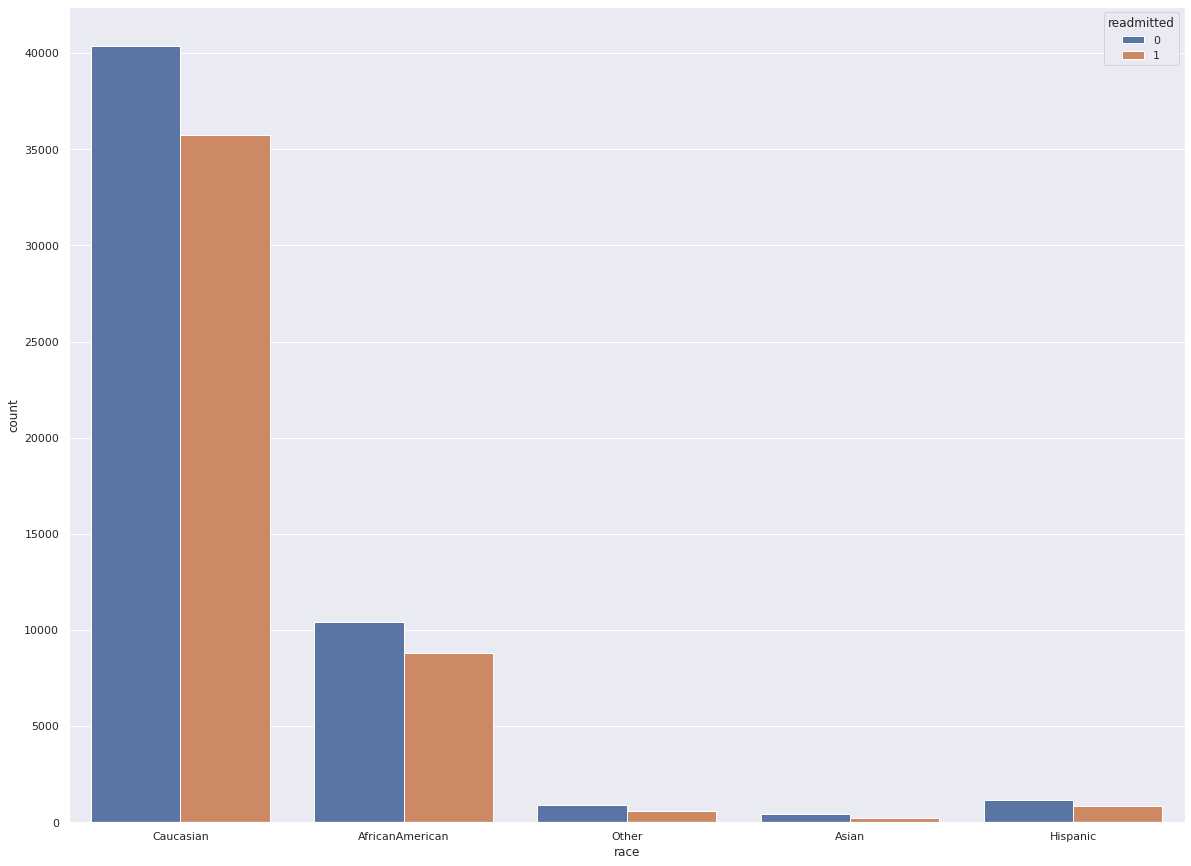

In [ ]:
sns.countplot(data = df, x = df['race'], hue = df['readmitted']);

####*Gender*

More likely for females

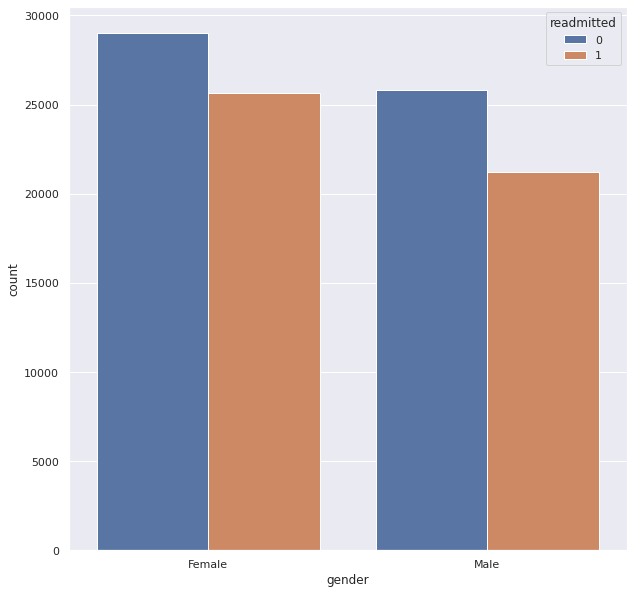

In [ ]:
sns.set(rc = {'figure.figsize': (10, 10)})
sns.countplot(data = df, x = df['gender'], hue = df['readmitted']);

####*Age*

More likely > 70

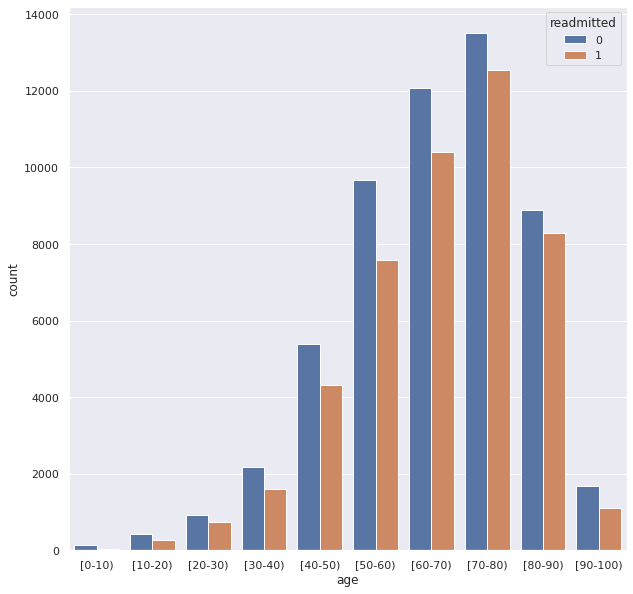

In [ ]:
sns.countplot(data = df, x = df['age'], hue = df['readmitted']);

####*Time in hospital*

More likely > 70

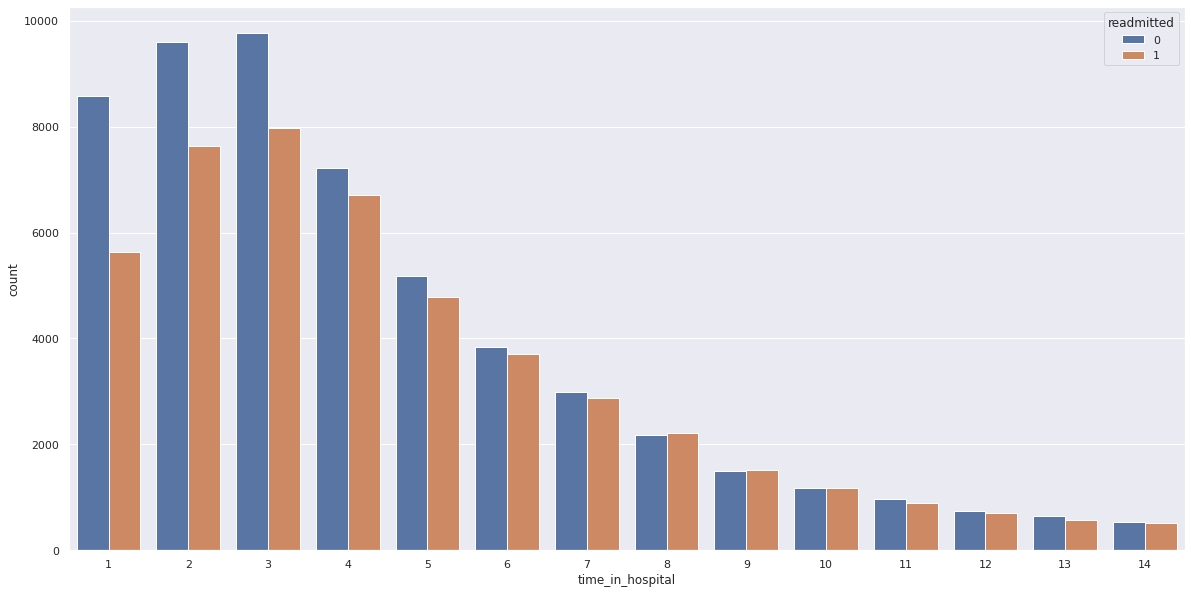

In [ ]:
sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data = df, x = df['time_in_hospital'], hue = df['readmitted']);

####*Number of lab procedures*

More likely >=2

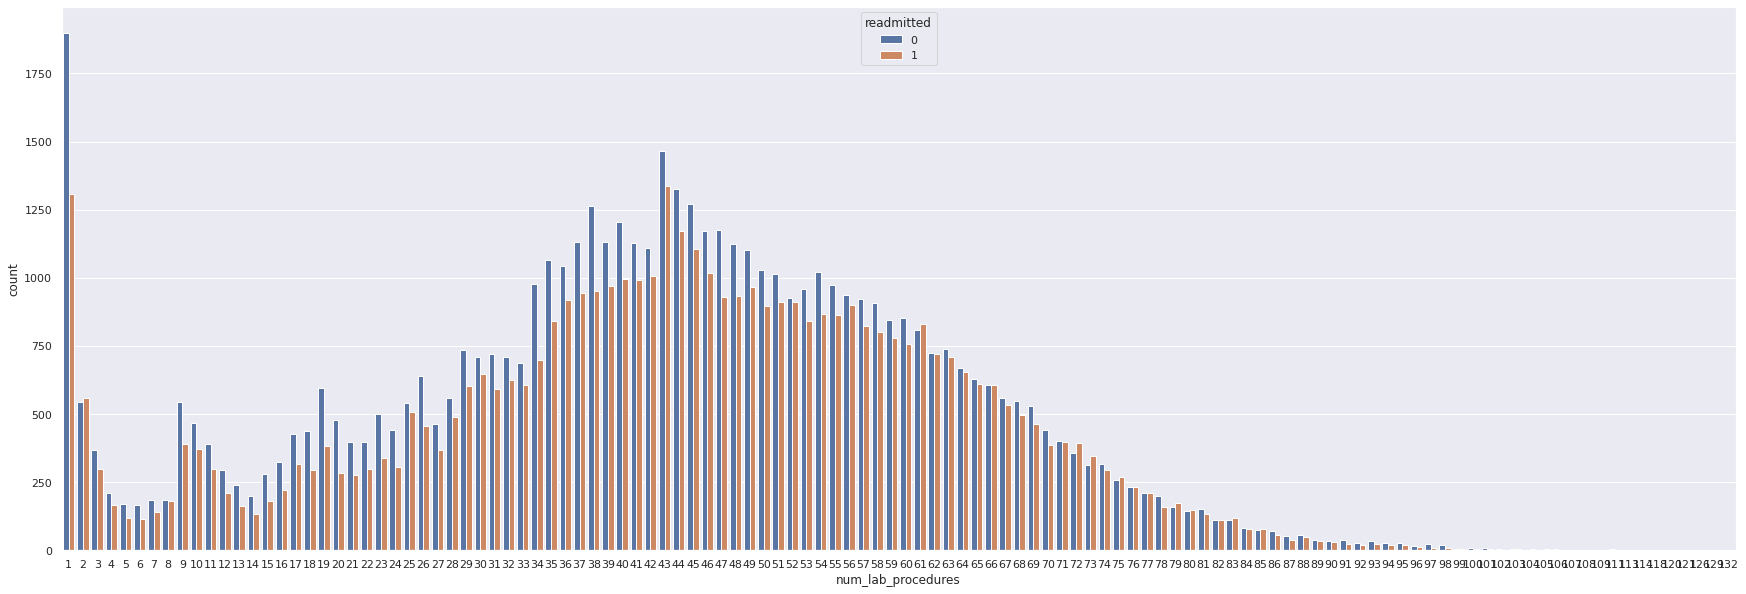

In [ ]:
sns.set(rc = {'figure.figsize': (30, 10)})
sns.countplot(data = df, x = df['num_lab_procedures'], hue = df['readmitted']);

####*Number of medications*

More likely >= 15

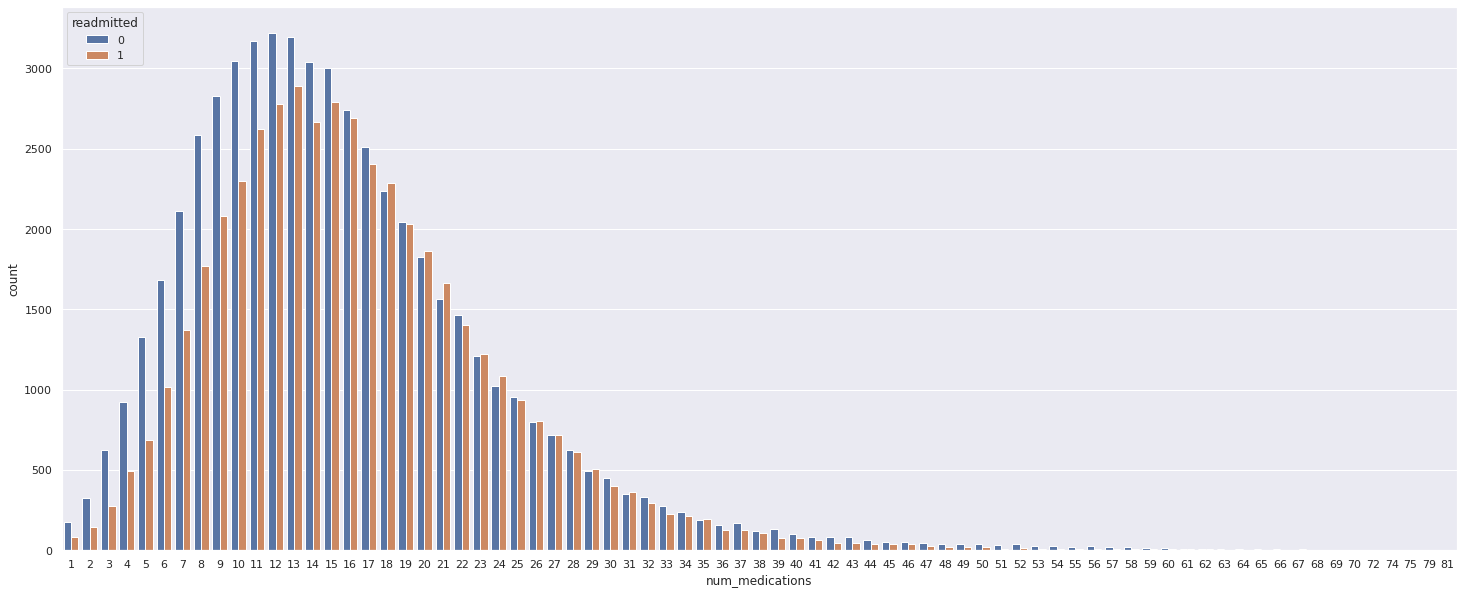

In [ ]:
sns.set(rc = {'figure.figsize': (25, 10)})
sns.countplot(data = df, x = df['num_medications'], hue = df['readmitted']);

####*Number of outpatient visits*

More likely >= 1

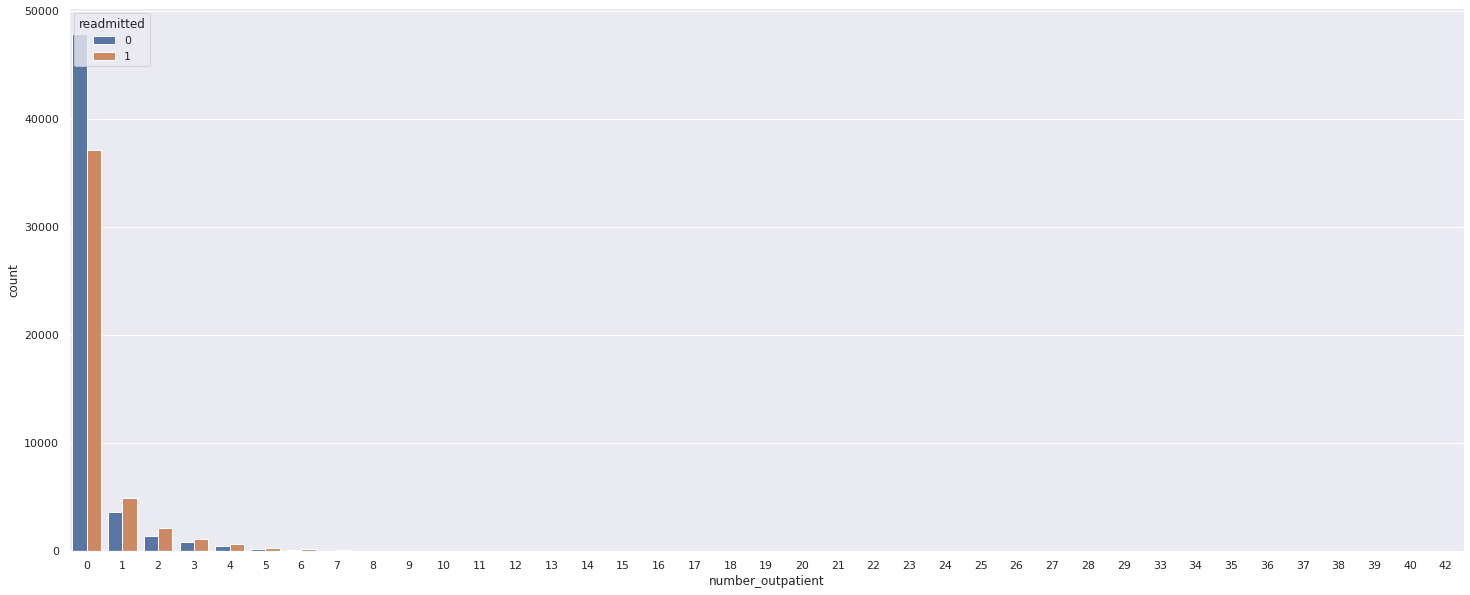

In [ ]:
sns.set(rc = {'figure.figsize': (25, 10)})
sns.countplot(data = df, x = df['number_outpatient'], hue = df['readmitted']);

####*Number of emergency room visits*

More likely >= 1

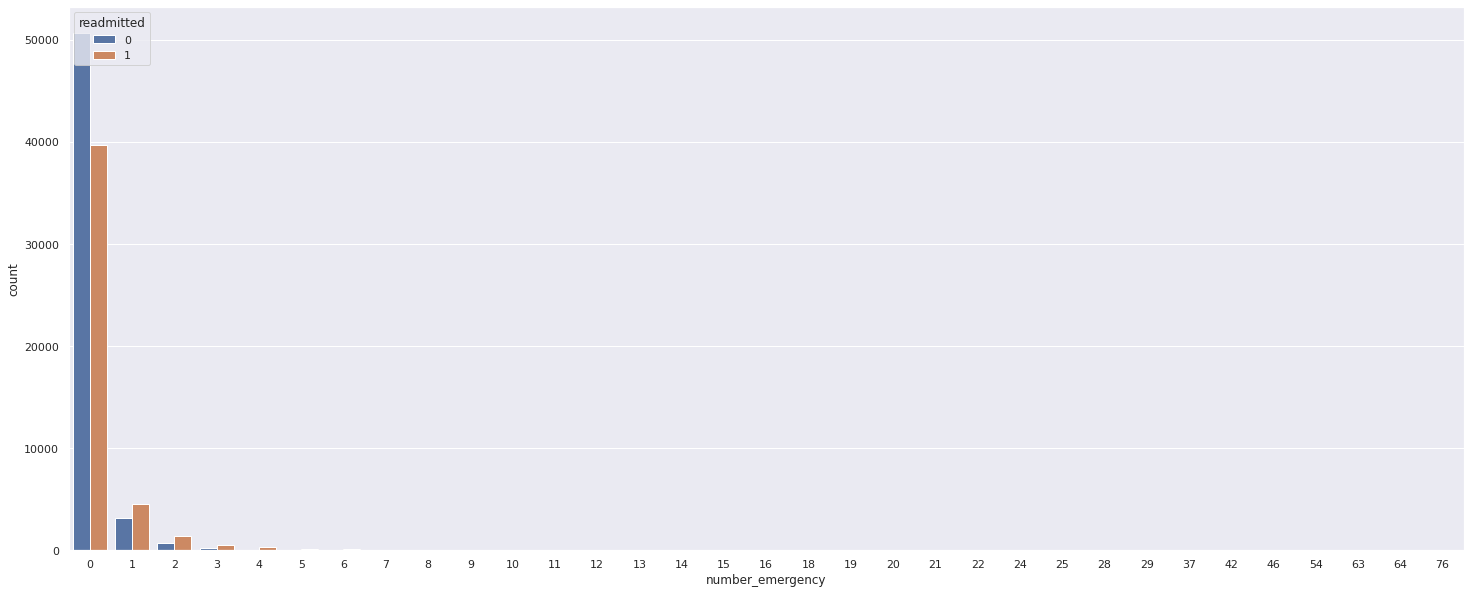

In [ ]:
sns.set(rc = {'figure.figsize': (25, 10)})
sns.countplot(data = df, x = df['number_emergency'], hue = df['readmitted']);

####*Number of inpatient visits*

More likely >= 1

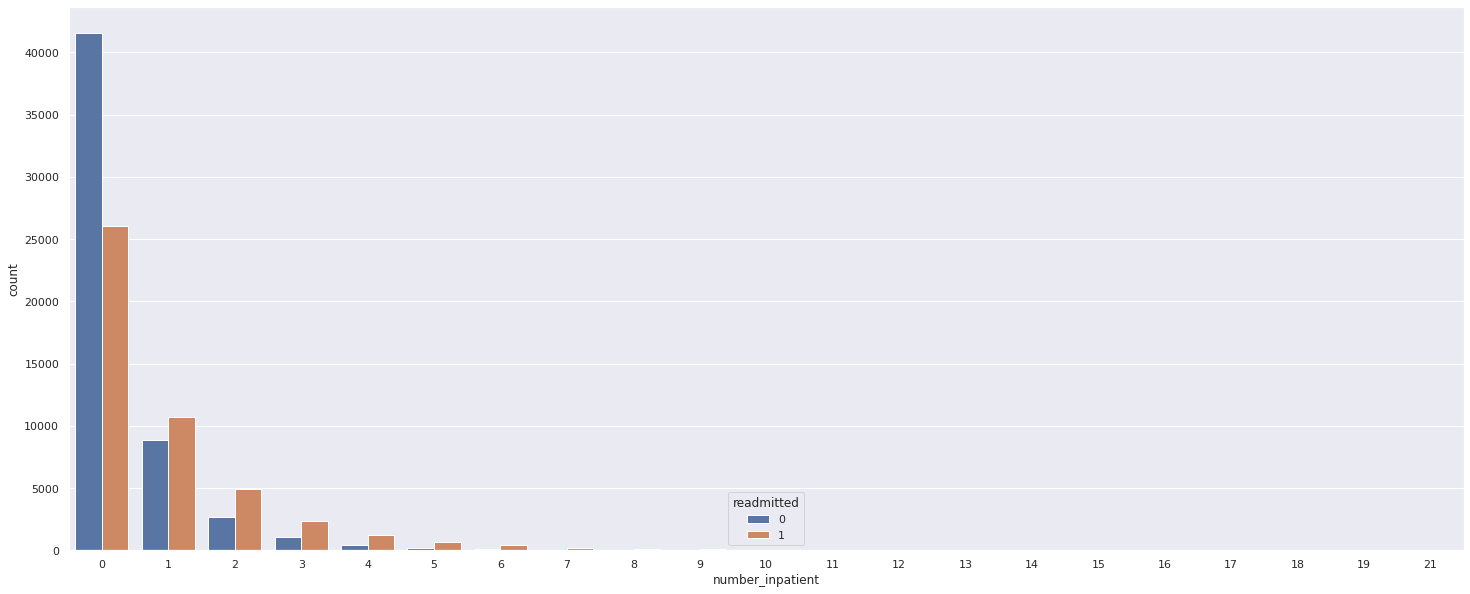

In [ ]:
sns.set(rc = {'figure.figsize': (25, 10)})
sns.countplot(data = df, x = df['number_inpatient'], hue = df['readmitted']);

####*Number of diagnoses*

More likely >= 6

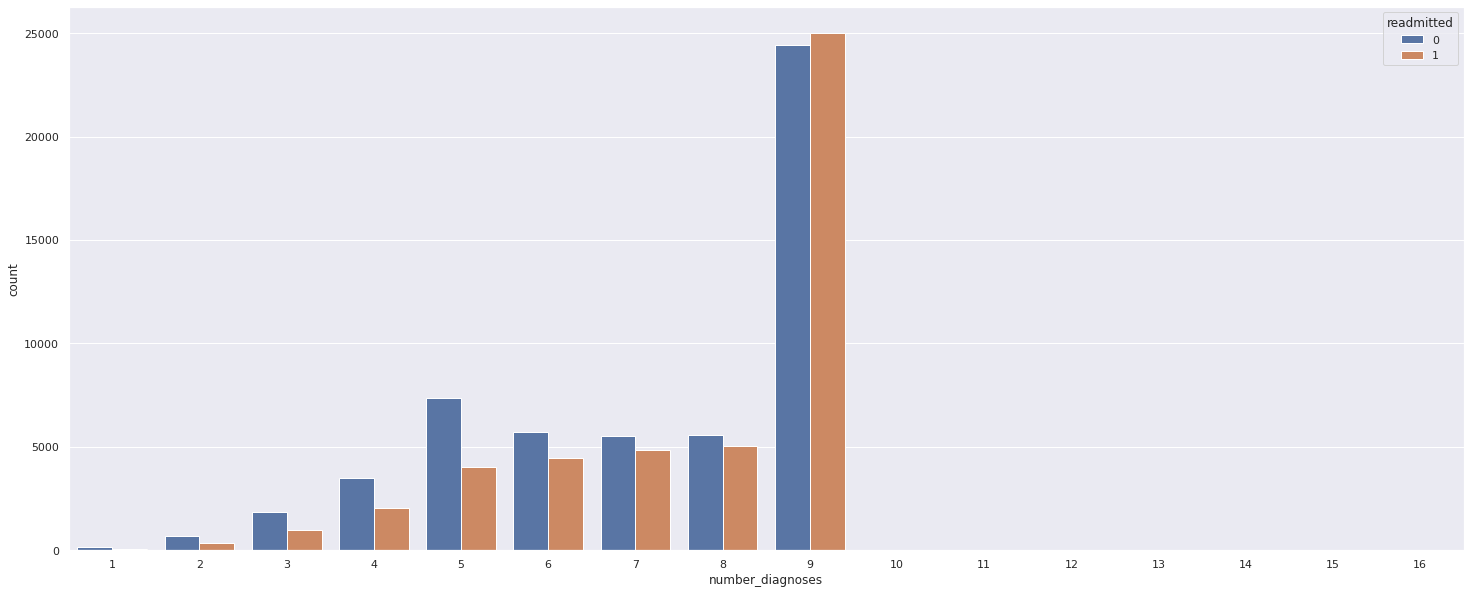

In [ ]:
sns.set(rc = {'figure.figsize': (25, 10)})
sns.countplot(data = df, x = df['number_diagnoses'], hue = df['readmitted']);

####*Change in diabetes medication*

More likely if yes (either dosage/medication itself changed)

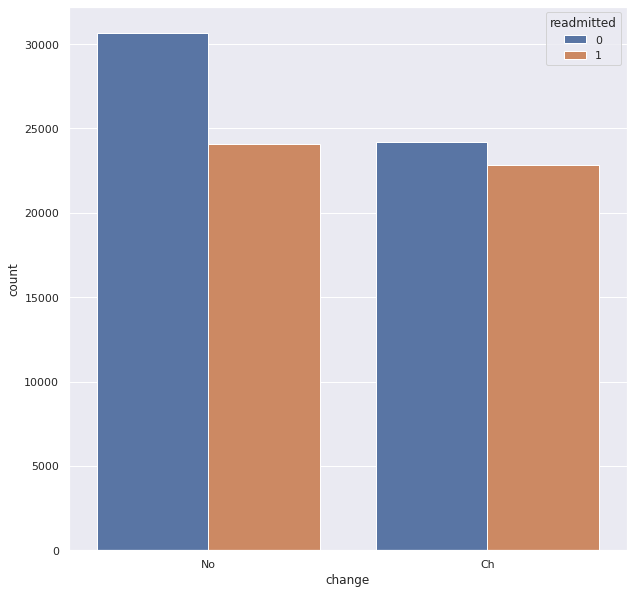

In [ ]:
sns.set(rc = {'figure.figsize': (10, 10)})
sns.countplot(data = df, x = df['change'], hue = df['readmitted']);

####*Prescribed diabetes medication*

More likely if yes

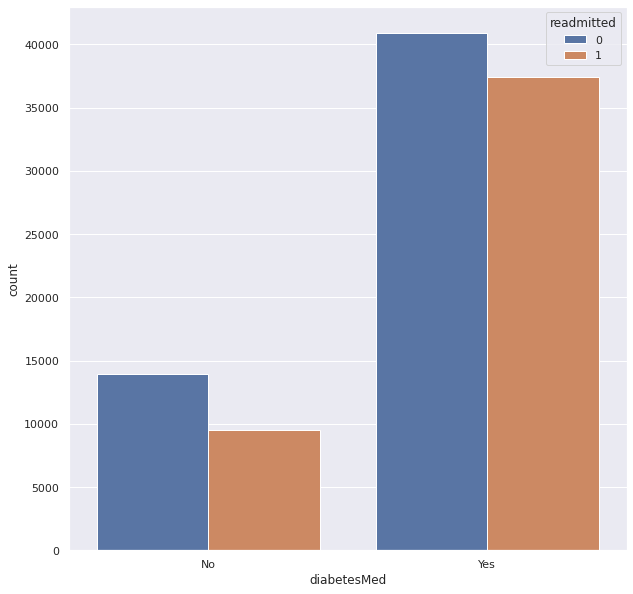

In [ ]:
sns.set(rc = {'figure.figsize': (10, 10)})
sns.countplot(data = df, x = df['diabetesMed'], hue = df['readmitted']);

#Feature Engineering & Further Data Wrangling

Because the machine learning models we want to use only support integer values, we must do further data wrangling to convert the values of categorical columns into either binary or integer values so our models (and computers) can understand them.

We also want to change some of the existing features into yes/no (binary) columns based on the above correlation analysis. For example, we found stronger correlations to readmission if a patient was over 70 years old. So instead of a fluid age scale, we will reengineer the column to be whether a patient is over 70 or not, so it can only take 0 (no) or 1 (yes) values.

At the same time, we will drop irrelevant columns and rename existing ones to make working with the dataset easier.

Data wrangling

In [ ]:
# Drop columns not used for model

df.drop([
         'encounter_id',
         'patient_nbr',
         'race',
         'weight',
         'admission_type_id',
         'discharge_disposition_id',
         'admission_source_id',
         'payer_code',
         'medical_specialty',
         'num_procedures',
         'diag_1',
         'diag_2',
         'diag_3',
         'max_glu_serum',
         'A1Cresult',
         'metformin',
         'repaglinide',
         'nateglinide',
         'chlorpropamide',
         'glimepiride',
         'acetohexamide',
         'glipizide',
         'glyburide',                    
         'tolbutamide',                  
         'pioglitazone',                 
         'rosiglitazone',               
         'acarbose',                    
         'miglitol',                     
         'troglitazone',                 
         'tolazamide',                  
         'examide',                     
         'citoglipton',                 
         'insulin',                     
         'glyburide-metformin',          
         'glipizide-metformin',          
         'glimepiride-pioglitazone',     
         'metformin-rosiglitazone',     
         'metformin-pioglitazone'],
        axis = 1, 
        inplace = True
)

Rename feature columns based on correlation analysis

In [ ]:
df.rename(columns = {
    'gender': 'female',
    'age': 'over_70',
    'time_in_hospital': 'days_4up',
    'num_lab_procedures': 'labs_2up',
    'num_medications': 'meds_15up',
    'number_outpatient': 'outpt_1up',
    'number_emergency': 'er_1up',
    'number_inpatient': 'inpt_1up',
    'number_diagnoses': 'diag_6up',
    'change': 'change_meds',
    'diabetesMed': 'prescribed_meds'
    }, inplace = True
)

Check updated dataframe

In [ ]:
df

,female,over_70,days_4up,labs_2up,meds_15up,outpt_1up,er_1up,inpt_1up,diag_6up,change_meds,prescribed_meds,readmitted
0,Female,[0-10),1,41,1,0,0,0,1,No,No,0
1,Female,[10-20),3,59,18,0,0,0,9,Ch,Yes,1
2,Female,[20-30),2,11,13,2,0,1,6,No,Yes,0
3,Male,[30-40),2,44,16,0,0,0,7,Ch,Yes,0
4,Male,[40-50),1,51,8,0,0,0,5,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,Male,[70-80),3,51,16,0,0,0,9,Ch,Yes,1
101762,Female,[80-90),5,33,18,0,0,1,9,No,Yes,0
101763,Male,[70-80),1,53,9,1,0,0,13,Ch,Yes,0
101764,Female,[80-90),10,45,21,0,0,1,9,Ch,Yes,0


###Modify values

In [ ]:
# Gender

df['female'].replace({
    'Female': '1',
    'Male': '0',
    'Unknown/Invalid': '0'
    }, inplace = True
)

In [ ]:
df['female'] = df['female'].astype(int)

In [ ]:
# Age

df['over_70'].replace({
    '[0-10)':0, 
    '[10-20)':0, 
    '[20-30)':0,
    '[30-40)':0,
    '[40-50)':0,
    '[50-60)':0,
    '[60-70)':0,
    '[70-80)':1,
    '[80-90)':1,
    '[90-100)':1
    }, inplace = True
)

In [ ]:
# Time in hospital

df['days_4up'] = np.where(df['days_4up'] >= 4, 1, 0)

In [ ]:
# Number of lab procedures

df['labs_2up'] = np.where(df['labs_2up'] >= 2, 1, 0)

In [ ]:
# Number of medications

df['meds_15up'] = np.where(df['meds_15up'] >= 15, 1, 0)

In [ ]:
# Number of outpatient visits

df['outpt_1up'] = np.where(df['outpt_1up'] >= 1, 1, 0)

In [ ]:
# Number of emergency room visits

df['er_1up'] = np.where(df['er_1up'] >= 1, 1, 0)

In [ ]:
# Number of inpatient visits

df['inpt_1up'] = np.where(df['inpt_1up'] >= 1, 1, 0)

In [ ]:
# Number of diagnoses

df['diag_6up'] = np.where(df['diag_6up'] >= 6, 1, 0)

In [ ]:
# Change in meds

df['change_meds'].replace({
    'No':0, 
    'Ch':1
    }, inplace = True
)

In [ ]:
# Prescribed diabetes medication

df['prescribed_meds'].replace({
    'No':0, 
    'Yes':1, 
    }, inplace = True
)

Check updated dataframe

In [ ]:
df

,female,over_70,days_4up,labs_2up,meds_15up,outpt_1up,er_1up,inpt_1up,diag_6up,change_meds,prescribed_meds,readmitted
0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,1,1
2,1,0,0,1,0,1,0,1,1,0,1,0
3,0,0,0,1,1,0,0,0,1,1,1,0
4,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,0,1,1,0,0,0,1,1,1,1
101762,1,1,1,1,1,0,0,1,1,0,1,0
101763,0,1,0,1,0,1,0,0,1,1,1,0
101764,1,1,1,1,1,0,0,1,1,1,1,0


#Machine Learning

###Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Assign testing and training data

X = df[[
    'female',
    'over_70',
    'days_4up',
    'labs_2up',
    'meds_15up',
    'outpt_1up',
    'er_1up',
    'inpt_1up',
    'diag_6up',
    'change_meds',
    'prescribed_meds'
]]
y = df['readmitted']

In [ ]:
# Apply test/train split and determine size of test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

###Random Forest Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fit data to model with n = 100

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Run and print predictions using data

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[9991 3708]
 [6115 5628]]
              precision    recall  f1-score   support

           0       0.62      0.73      0.67     13699
           1       0.60      0.48      0.53     11743

    accuracy                           0.61     25442
   macro avg       0.61      0.60      0.60     25442
weighted avg       0.61      0.61      0.61     25442



###KNN Model

In [ ]:
# Fit data to model with n = 100

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
# Run and print predictions using data

knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[10310  3389]
 [ 6445  5298]]
              precision    recall  f1-score   support

           0       0.62      0.75      0.68     13699
           1       0.61      0.45      0.52     11743

    accuracy                           0.61     25442
   macro avg       0.61      0.60      0.60     25442
weighted avg       0.61      0.61      0.60     25442



In [ ]:
# Rerun model through 20 iterations and plot changing error rate vs. K-value

error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

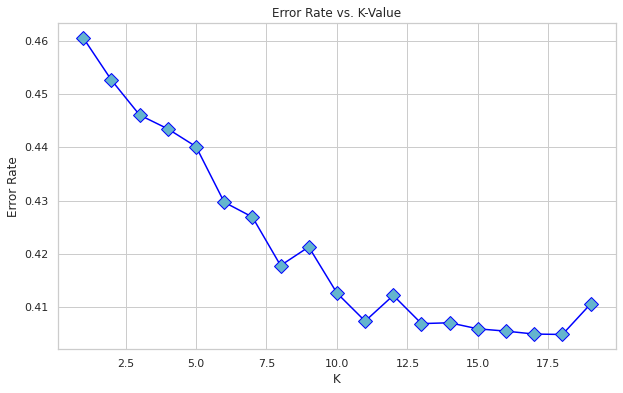

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))
plt.plot(range(1, 20), error_rate, color = 'blue', linestyle = '-', marker = 'D', markerfacecolor = 'c', markersize = 10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#Conclusions

Our models, unfortunately, are not accurate at all. They are slightly better at predicting whether someone was NOT readmitted within the given time frame than if they were.

That said, we were able to slighty improve their accuracy through reengineering existing data. In our first models with only a few of the original columns, our models predicted readmission only 50-55% of the time. After feature engineering, we improved our models by a very modest 5-10%. (Still not that accurate, but at least better instead of worse!)

Our thinking is on the correct track for attaining greater accuracy. Through this project, we were able to deepen our understanding of machine learning and how to more deeply analyze real-life datasets using Python.


